In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
#Load CSV´s
DShippo = pd.read_csv("datasets/train_radiomics_hipocamp.csv")
test_DShippo = pd.read_csv("datasets/test_radiomics_hipocamp.csv")

In [79]:
# First rows
DShippo.head()

,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [80]:
# Dataset info
DShippo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


In [81]:
# Descrição das colunas
DShippo.describe()

,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,2.681657,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.259507,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,1.984788,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,2.507947,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,2.688709,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,2.844025,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,3.494062,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000


In [82]:
# Valores nulos por coluna
DShippo.isnull().sum()

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Transition                          0
Length: 2181, dtype: int64

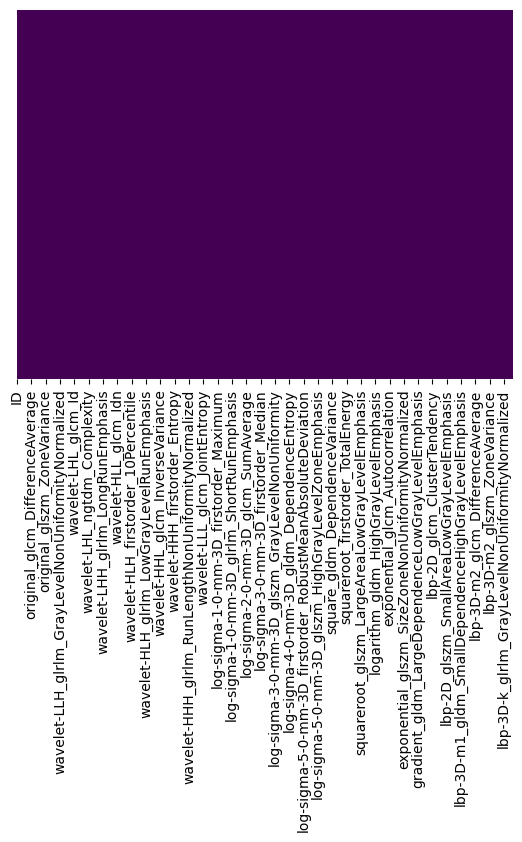

In [83]:
# Gráfico dos valores nulos 
sns.heatmap(DShippo.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [84]:
# Identificar linhas duplicadas
duplicados = DShippo.duplicated()
print(f"Linhas duplicadas: {duplicados.sum()}")  # Conta duplicados

# Exibir as linhas duplicadas (se houver)
if duplicados.sum() > 0:
    print("Duplicados:")
    print(DShippo[duplicados])
    # Remover duplicados
    DShippo.drop_duplicates(inplace=True)
    print(f"Linhas após remover duplicados: {DShippo.shape[0]}")

Linhas duplicadas: 0


In [85]:
# Identificar as colunas que possuem sempre o mesmo valor
columns_nunique_1 = DShippo.columns[DShippo.nunique() == 1]

display(DShippo[columns_nunique_1].head())

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,...,lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis,lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis,lbp-3D-m2_glszm_SizeZoneNonUniformity,lbp-3D-m2_glszm_SizeZoneNonUniformityNormalized,lbp-3D-m2_glszm_ZoneEntropy,lbp-3D-m2_ngtdm_Busyness,lbp-3D-m2_ngtdm_Coarseness,lbp-3D-m2_ngtdm_Complexity,lbp-3D-m2_ngtdm_Contrast,lbp-3D-m2_ngtdm_Strength
0,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
1,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
2,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
3,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0
4,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",3,"(1.0, 1.0, 1.0)","(256, 256, 256)",...,1,1,1,0.5,1.0,0,1000000,0,0,0


In [86]:
#Remover as colunas que possuem o mesmo valor
DShippo=DShippo.drop(columns=columns_nunique_1)

display(DShippo.head())

,ID,Image,Mask,diagnostics_Image-original_Hash,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_CenterOfMassIndex,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,b5d774a32163a7ee822d42a07808a787f8687f56,5.848123,178,315bdd7a06bb73df17bfc1297398b4398e36e180,"(103, 113, 93, 36, 30, 71)",7106,"(121.94230227976358, 129.27272727272728, 128.4...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,397042d736bd790b7880b372b1749ff424f89cbe,5.238834,190,208a2b034b72592489315104ef526ca10d434f24,"(81, 127, 93, 47, 16, 73)",7779,"(107.06170458927883, 135.28088443244633, 128.2...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,84d679a88812c4aaf03a6d99f00c913b2f64506f,6.816667,155,352220437f6381b051fd4173969519887b530df6,"(77, 119, 89, 49, 30, 81)",6707,"(103.3640972118682, 135.28164604144922, 128.98...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,168f330d2ca3f097146e5d041f33b40672d230df,6.445162,171,9f62584e8badeb5de90b797d0c86c5170465d90f,"(93, 102, 90, 41, 29, 78)",8281,"(116.29827315541601, 118.67431469629271, 129.3...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,ea5f291ea107dfda5e5c725eae7c0555ced44ce4,5.568269,150,62ab23b0a4ea4c9e7574b1ea410bd90236fe1d6e,"(87, 119, 91, 40, 27, 75)",5986,"(108.26561977948546, 132.05462746408287, 127.6...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [87]:
# Mudar o id para numeros de 0 a 304
DShippo['ID'] = pd.factorize(DShippo['ID'])[0] + 1

display(DShippo.head())

,ID,Image,Mask,diagnostics_Image-original_Hash,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_CenterOfMassIndex,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,1,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,b5d774a32163a7ee822d42a07808a787f8687f56,5.848123,178,315bdd7a06bb73df17bfc1297398b4398e36e180,"(103, 113, 93, 36, 30, 71)",7106,"(121.94230227976358, 129.27272727272728, 128.4...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,2,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,397042d736bd790b7880b372b1749ff424f89cbe,5.238834,190,208a2b034b72592489315104ef526ca10d434f24,"(81, 127, 93, 47, 16, 73)",7779,"(107.06170458927883, 135.28088443244633, 128.2...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,3,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,84d679a88812c4aaf03a6d99f00c913b2f64506f,6.816667,155,352220437f6381b051fd4173969519887b530df6,"(77, 119, 89, 49, 30, 81)",6707,"(103.3640972118682, 135.28164604144922, 128.98...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,4,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,168f330d2ca3f097146e5d041f33b40672d230df,6.445162,171,9f62584e8badeb5de90b797d0c86c5170465d90f,"(93, 102, 90, 41, 29, 78)",8281,"(116.29827315541601, 118.67431469629271, 129.3...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,5,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,ea5f291ea107dfda5e5c725eae7c0555ced44ce4,5.568269,150,62ab23b0a4ea4c9e7574b1ea410bd90236fe1d6e,"(87, 119, 91, 40, 27, 75)",5986,"(108.26561977948546, 132.05462746408287, 127.6...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [88]:
# Observar os data types 
display(DShippo.dtypes)

ID                                   int64
Image                               object
Mask                                object
diagnostics_Image-original_Hash     object
diagnostics_Image-original_Mean    float64
                                    ...   
lbp-3D-k_ngtdm_Contrast            float64
lbp-3D-k_ngtdm_Strength            float64
Sex                                  int64
Age                                float64
Transition                          object
Length: 2022, dtype: object

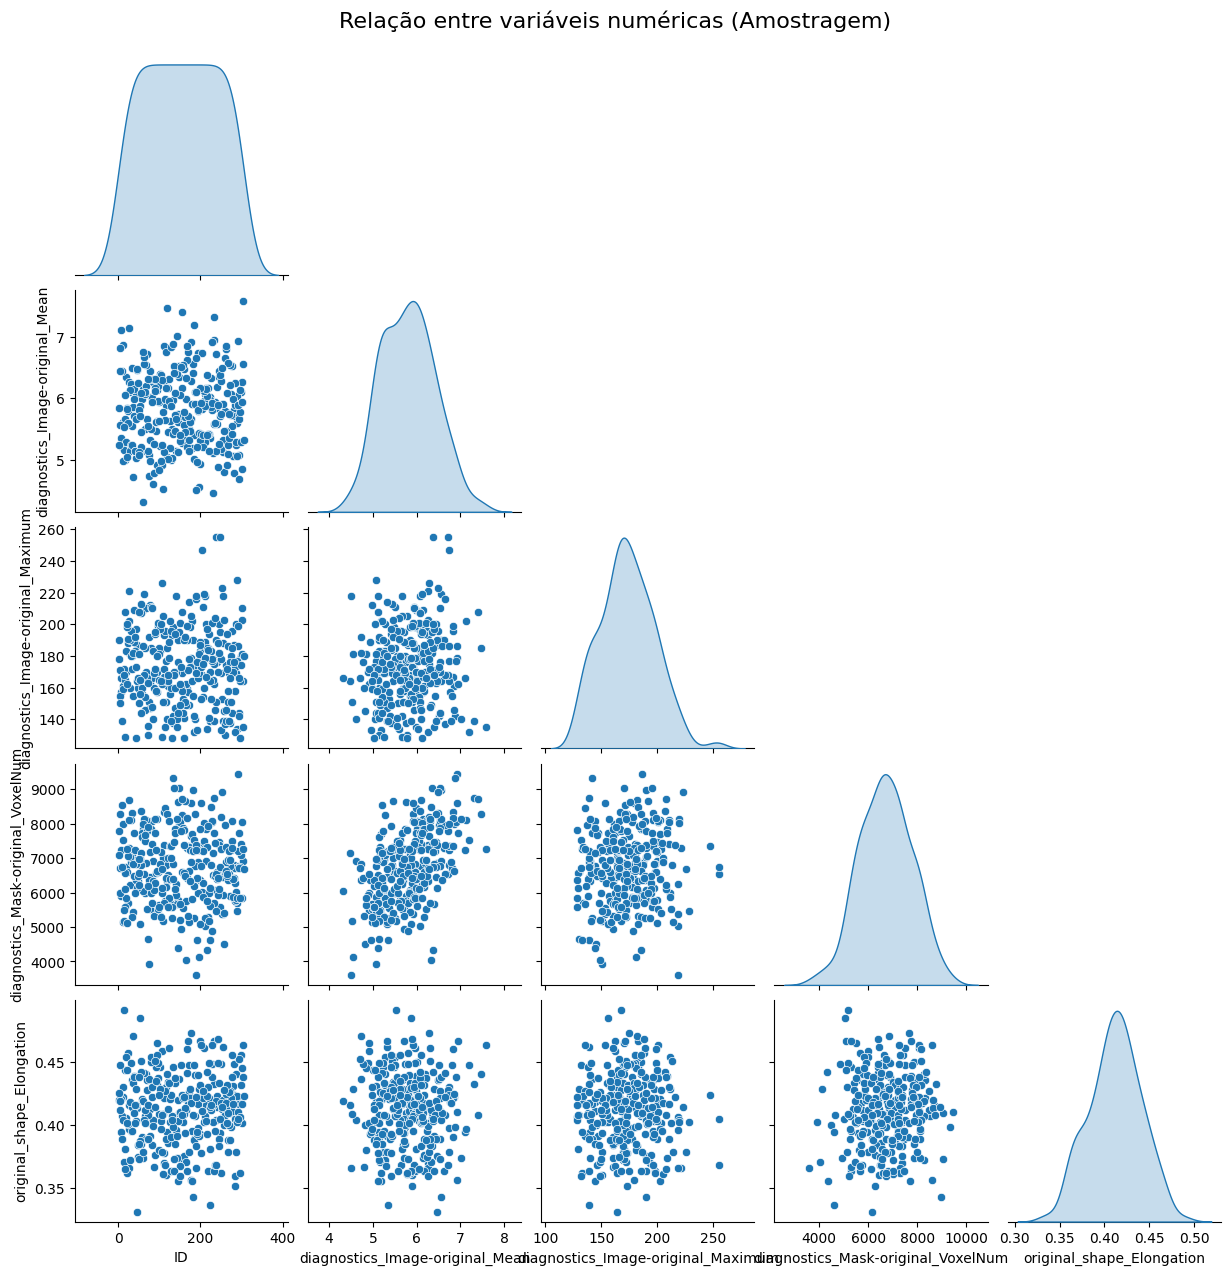

In [89]:
# Determinar o tamanho da amostra baseado no tamanho do dataset
sample_size = min(500, len(DShippo))  # Usa 500 ou o tamanho total do dataset, o que for menor

# Seleção de um subconjunto de variáveis numéricas
numeric_columns = DShippo.select_dtypes(include=["float", "int"]).columns
selected_columns = numeric_columns[:5]  # Limita para as 5 primeiras variáveis numéricas (ajuste conforme necessário)

# Verifica se há mais de uma variável para o pairplot
if len(selected_columns) > 1:
    sampled_data = DShippo[selected_columns].sample(n=sample_size, random_state=42)  # Amostra ajustada
    sns.pairplot(sampled_data, diag_kind="kde", corner=True, height=2.5)
    plt.suptitle("Relação entre variáveis numéricas (Amostragem)", y=1.02, fontsize=16)
    plt.show()
else:
    print("Número insuficiente de variáveis numéricas para gerar um pairplot.")

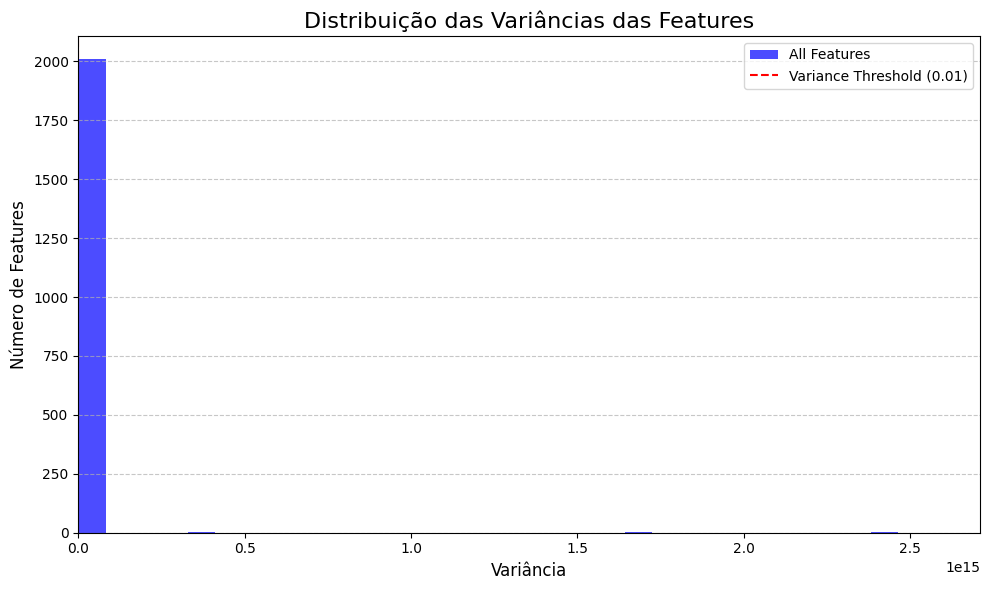

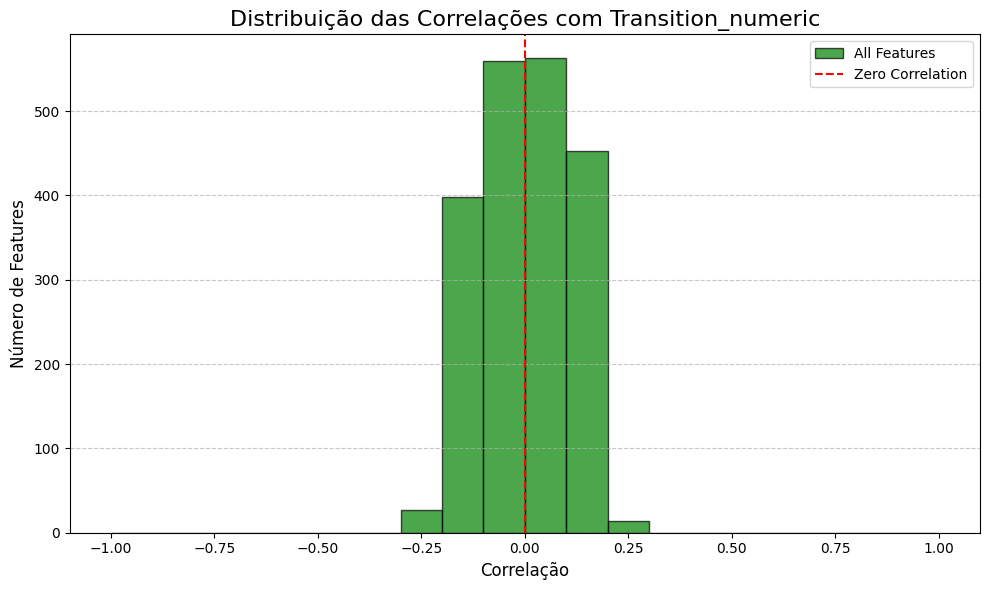

In [90]:
import pandas as pd
import matplotlib.pyplot as plt


# Gráfico 1: Distribuição das Variâncias
def plot_variance_distribution(df, threshold=0.01):

    # Calcular a variância de todas as colunas numéricas
    numerical_cols = df.select_dtypes(include=['number'])
    variances = numerical_cols.var()
    
    # Criar o histograma da distribuição das variâncias
    plt.figure(figsize=(10, 6))
    plt.hist(variances, bins=30, color='blue', alpha=0.7, label="All Features")
    plt.axvline(threshold, color='red', linestyle='--', label=f"Variance Threshold ({threshold})")
    plt.title("Distribuição das Variâncias das Features", fontsize=16)
    plt.xlabel("Variância", fontsize=12)
    plt.ylabel("Número de Features", fontsize=12)
    plt.xlim(0, variances.max() * 1.1)  # Ajustar o limite do eixo X para incluir toda a faixa
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_correlation_distribution(df, target_col='Transition_numeric', bins=20):
    # Certificar-se de que a coluna alvo está convertida para numérica
    if target_col not in df.columns:
        df[target_col] = pd.factorize(df['Transition'])[0]
    
    # Selecionar apenas colunas numéricas
    numerical_cols = df.select_dtypes(include=['number'])
    
    # Calcular a matriz de correlação
    correlation_matrix = numerical_cols.corr()
    
    # Selecionar as correlações com a variável alvo
    correlations = correlation_matrix[target_col].drop(target_col)
    
    # Criar o histograma da distribuição das correlações
    plt.figure(figsize=(10, 6))
    plt.hist(correlations, bins=bins, range=(-1, 1), color='green', alpha=0.7, edgecolor='black', label="All Features")
    plt.axvline(0, color='red', linestyle='--', label="Zero Correlation")
    plt.title("Distribuição das Correlações com Transition_numeric", fontsize=16)
    plt.xlabel("Correlação", fontsize=12)
    plt.ylabel("Número de Features", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Executar os gráficos no dataset DShippo
plot_variance_distribution(DShippo)  # Analisar a variância
plot_correlation_distribution(DShippo)  # Analisar as correlações


In [91]:
#ver a alta correlação, intervalos >= 0.8 e <= -0.8
import matplotlib.pyplot as plt
import numpy as np

def plot_high_correlation_intervals(df, correlation_threshold=0.85):
    # Calcular a matriz de correlação
    correlation_matrix = df.corr(numeric_only=True)
    
    # Selecionar a parte superior da matriz para evitar duplicatas
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Filtrar correlações nos intervalos de interesse
    high_positive_corr = upper_triangle.stack()[(upper_triangle.stack() >= correlation_threshold)]
    high_negative_corr = upper_triangle.stack()[(upper_triangle.stack() <= -correlation_threshold)]
    
    # Criar os gráficos
    plt.figure(figsize=(10, 6))
    plt.hist(high_positive_corr, bins=20, color='green', alpha=0.7, edgecolor='black', label='Correlação >= 0.85')
    plt.hist(high_negative_corr, bins=20, color='red', alpha=0.7, edgecolor='black', label='Correlação <= -0.85')
    plt.title("Distribuição de Altas Correlações (>= 0.85 e <= -0.85)", fontsize=16)
    plt.xlabel("Correlação", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
#ver a variancia baixa <= 0.01
def plot_low_variance_interval(df, variance_threshold=0.01):
    # Calcular a variância
    numerical_cols = df.select_dtypes(include=['number'])  # Apenas colunas numéricas
    variances = numerical_cols.var()
    
    # Filtrar variâncias no intervalo de interesse
    low_variance_features = variances[variances <= variance_threshold]
    
    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.hist(low_variance_features, bins=20, color='blue', alpha=0.7, edgecolor='black', label=f"Variância <= {variance_threshold}")
    plt.title("Distribuição de Features com Baixa Variância (<= 0.01)", fontsize=16)
    plt.xlabel("Variância", fontsize=12)
    plt.ylabel("Número de Features", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


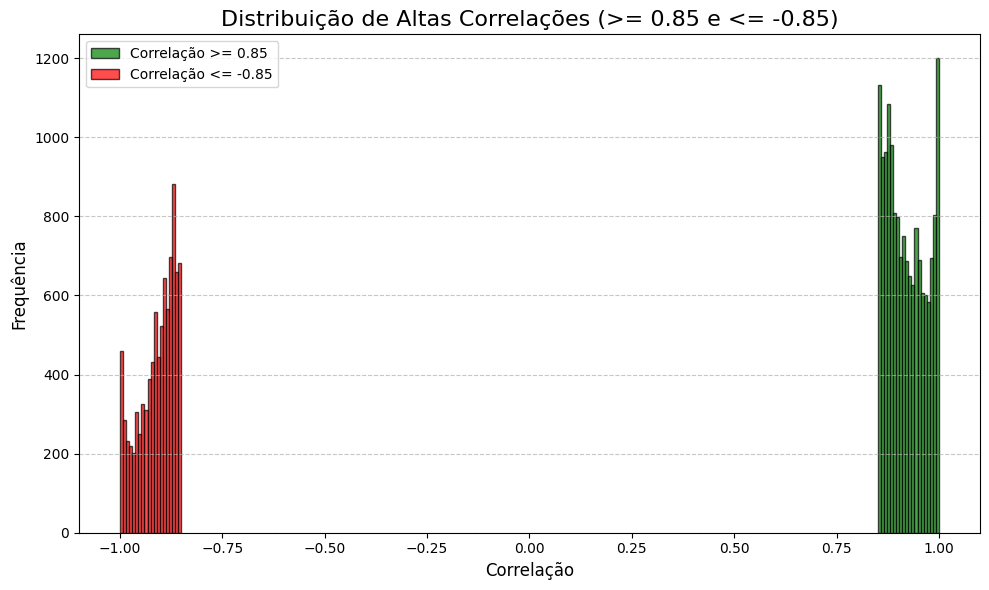

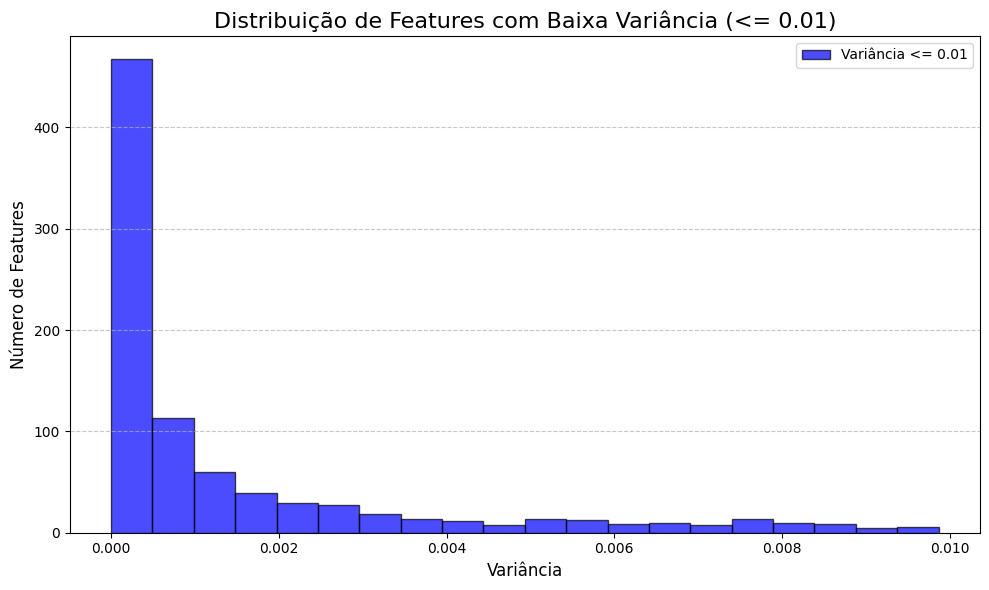

In [92]:
#executar as funções criadas
plot_high_correlation_intervals(DShippo)
plot_low_variance_interval(DShippo)

In [93]:
import pandas as pd
import numpy as np

def preprocess_dataset(df, variance_threshold=0.01, correlation_threshold=0.85):
    """
    Pré-processar o dataset eliminando:
    1. Features com baixa variância.
    2. Features altamente correlacionadas.
    
    Args:
        df (pd.DataFrame): O dataset original.
        variance_threshold (float): Limite para considerar variância baixa.
        correlation_threshold (float): Limite para considerar correlação alta.

    Returns:
        pd.DataFrame: Dataset preprocessado.
        list: Features removidas por baixa variância.
        list: Features removidas por alta correlação.
    """
    # 1. Remover features com baixa variância
    numerical_cols = df.select_dtypes(include=['number'])  # Apenas colunas numéricas
    variances = numerical_cols.var()
    low_variance_features = variances[variances < variance_threshold].index
    df = df.drop(columns=low_variance_features, errors='ignore')  # Remover features de baixa variância

    # 2. Remover features altamente correlacionadas
    correlation_matrix = df.corr(numeric_only=True)  # Matriz de correlação
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Identificar features com alta correlação
    high_corr_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > correlation_threshold)]
    df = df.drop(columns=high_corr_features, errors='ignore')  # Remover features altamente correlacionadas

    return df, low_variance_features, high_corr_features

# Aplicar ao teu dataset
DShippo_cleaned, removed_low_variance, removed_high_corr = preprocess_dataset(DShippo)

# Mostrar resultados
print(f"Features removidas por baixa variância (<{0.01}): {len(removed_low_variance)}")
print(f"Features removidas por alta correlação (|correlação| > {0.80}): {len(removed_high_corr)}")
print(f"Dimensões do dataset após limpeza: {DShippo_cleaned.shape}")


Features removidas por baixa variância (<0.01): 885
Features removidas por alta correlação (|correlação| > 0.8): 768
Dimensões do dataset após limpeza: (305, 370)


In [94]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Dividir o dataset de treino
X = DShippo.drop(columns=['Transition', 'Transition_numeric'], errors='ignore')  # Features
y = DShippo['Transition']  # Variável-alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

# 3. Definir os modelos (sem XGBoost)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 4. Avaliar cada modelo e calcular os scores
results = []

for model_name, model in models.items():
    print(f"Treinando o modelo: {model_name}...")
    model.fit(X_train_scaled, y_train)  # Treinar o modelo
    y_pred = model.predict(X_test_scaled)  # Prever no conjunto de teste
    f1 = f1_score(y_test, y_pred, average='macro')  # Calcular o F1 Score
    results.append((model_name, f1))  # Guardar o score
    print(f"{model_name}: F1 Score = {f1:.4f}")

# Organizar os resultados em um DataFrame
results_df = pd.DataFrame(results, columns=["Modelo", "F1 Score"]).sort_values(by="F1 Score", ascending=False)

# Exibir os resultados ordenados
print("\nResultados Comparativos:")
print(results_df)

# Identificar o melhor modelo
best_model_name = results_df.iloc[0]['Modelo']
best_model_score = results_df.iloc[0]['F1 Score']
print(f"\nMelhor Modelo: {best_model_name} com F1 Score = {best_model_score:.4f}")


Treinando o modelo: Random Forest...
Random Forest: F1 Score = 0.3753
Treinando o modelo: Support Vector Machine...
Support Vector Machine: F1 Score = 0.3983
Treinando o modelo: Neural Network...
Neural Network: F1 Score = 0.3840
Treinando o modelo: K-Nearest Neighbors...
K-Nearest Neighbors: F1 Score = 0.2855

Resultados Comparativos:
                   Modelo  F1 Score
1  Support Vector Machine  0.398279
2          Neural Network  0.383954
0           Random Forest  0.375330
3     K-Nearest Neighbors  0.285479

Melhor Modelo: Support Vector Machine com F1 Score = 0.3983


In [95]:
import numpy as np
import pandas as pd

# Garantir que as predições têm 100 linhas
if len(test_predictions) < 100:
    print("Ajustando predições para garantir 100 linhas...")
    missing_rows = 100 - len(test_predictions)
    # Encontrar o rótulo mais frequente usando NumPy
    unique, counts = np.unique(test_predictions, return_counts=True)
    most_frequent_label = unique[np.argmax(counts)]  # Rótulo mais frequente
    test_predictions = np.append(test_predictions, [most_frequent_label] * missing_rows)

# Garantir que o RowId também tem 100 valores
submission = pd.DataFrame({
    'RowId': range(1, 101),  # IDs sequenciais de 1 a 100
    'Result': test_predictions[:100]  # Exatamente 100 predições
})

# Salvar o arquivo CSV
submission.to_csv('datasets_alterados/dummy_submission.csv', index=False)

# Exibir as primeiras linhas para validação
print("Primeiras linhas do arquivo de submissão:")
print(submission.head())


Primeiras linhas do arquivo de submissão:
   RowId Result
0      1  CN-CN
1      2  CN-CN
2      3  CN-CN
3      4  AD-AD
4      5  CN-CN
